Saving 10.jpg to 10.jpg
Pitch coordinates for 10.jpg: [[ 75 187]
 [ 78 192]
 [139 189]
 [138 186]]


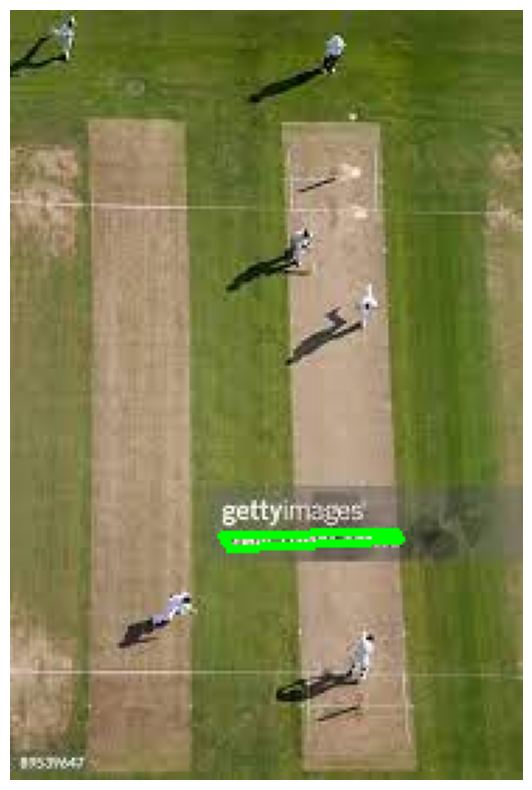

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

def detect_pitch(image):
    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the largest contour (assumed to be the pitch)
        pitch_contour = max(contours, key=cv2.contourArea)

        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(pitch_contour, True)
        approx = cv2.approxPolyDP(pitch_contour, epsilon, True)

        # Check if the approximated contour has 4 corners (pitch is roughly rectangular)
        if len(approx) == 4:
            # Get the corner points of the pitch
            pitch_coords = approx.reshape(4, 2)  # Reshape to get the coordinates
            return pitch_coords

    return None

def show_image_with_pitch(image, pitch_coords):
    # Draw the detected pitch on the image
    if pitch_coords is not None:
        for i in range(len(pitch_coords)):
            cv2.line(image, tuple(pitch_coords[i]), tuple(pitch_coords[(i + 1) % 4]), (0, 255, 0), 2)

    # Convert image from BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Upload files
uploaded = files.upload()

for filename in uploaded.keys():
    image_path = os.path.join('/content', filename)  # Save uploaded file to /content
    image = cv2.imread(image_path)

    if image is not None:
        # Detect pitch in the new image
        pitch_coords = detect_pitch(image)

        if pitch_coords is not None:
            print(f"Pitch coordinates for {filename}: {pitch_coords}")
            # Show the image with pitch detection
            show_image_with_pitch(image, pitch_coords)
        else:
            print(f"No pitch detected in {filename}")
    else:
        print(f"Could not load image: {filename}")
